# From Questions to Code

### Understanding data granularity

## Outline
* Introduction to data granularity
* Pandas: `groupby`
* Simpson's Paradox
* Pandas: `join`
* Joining datasets of different granularity

## Website Visits

<div class="image-txt-container">
    
<img src="netflix.png" width="50%">

<div></div>


* **Types of Individuals**
* Visits to the netflix (browsing; video streamed)
* Customer accounts (paid subscriptions)

</div>


## Website Visits

<div class="image-txt-container">
    
<img src="netflix.png" width="50%">

<div></div>


- 140M streaming hrs/day (-\$)
- ~60M page visits/day (-\$)
- ~140M paid subscribers (+\$)
- 15M devices/day 
    * shared accounts?

</div>




# Design phase

If you can control how your dataset is created then you should determine the granularity of your data *before* collecting yet. 

Discuss advantages and disadvantages of a data that has too fine of a granularity.

# Design phase

If you can control how your dataset is created then you should determine the granularity of your data *before* collecting yet. 

**Advantages**

- We can change a fine granularity to a coarse one if needed (how?)
- No need to collect additional data (saves time)


**Disadvantages**

- Expensive to collect
- Takes space



# Manipulating Granularity

From the example above we saw that data can be represented in different levels. In order to work with data from different tables we can change the granularity of the data. 

The examples below will show you a few advanced techniques that allow you to manipulate granularity.



## Grouping and Aggregating Data

**split-apply-combine**


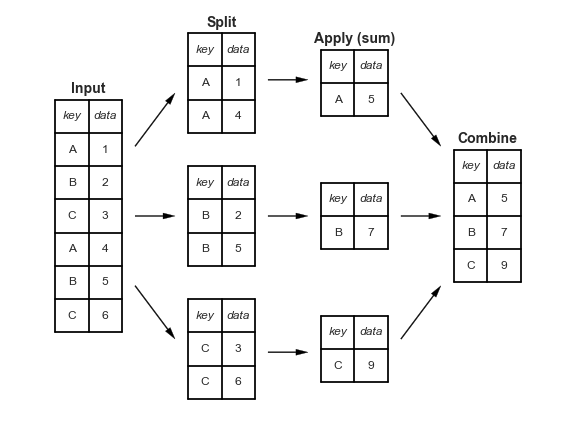



**Aggregation** is the process of turning the values of a dataset (or a subset of it) into one single value.


### Pandas `groupby` objects

This makes clear what the `groupby` accomplishes:

* **split** breaks up and groups a `DataFrame` depending on the value of the specified key.
* **apply** computes a function (e.g. aggregate, transformation, or filtering) within the individual groups.
* **combine** merges the results of these operations into an output array.


### How `groupby` computes

* The `groupby` can (often) do this in a *single* pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way. 

* `groupby` abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

## `groupby` and `aggregate/apply/transform`

* `groupby`: grouping collections of records over a set of fields for computing quantities over the remaining fields.
    - `groupby` is a dataframe method that returns a `groupby` object.


* `aggregate`: aggregating using one or more operations over the specified axis (also `apply/transform`)
    - `aggregate` is a `groupby` object method that returns a Series/DataFrame.



### `groupby` example

To illustrate these operations we will use some toy data about peoples favorite colors and numbers. 

For each color, how people have it as their favorite?


In [ ]:
import pandas as pd
import numpy as np

people = pd.DataFrame(
    [["Joey", "blue", 42,"M"],
     ["Weiwei","blue", 50,"F"],
     ["Joey", "green", 8,"M"],
     ["Karina", "green",7, "F"],
     ["Fernando", "pink", -9,"M"],
     ["Nhi","blue",3,"F"],
     ["Sam","pink", -42,"M"]], 
    columns = ["Name", "Color", "Number", "Sex"])
people

In [ ]:
# using loc

people.loc[people['Color']=="blue", : ]


# Colors green and pink require the same code. Too much work.

In [ ]:
colors = {}
for color in people['Color'].unique():
    filtered_for_color = people.loc[people['Color'] == color, : ]
    colors[color] = len(filtered_for_color)

pd.Series(colors)

In [ ]:
# can you think of another way of doing this, that we've seen already?
#

### `groupby` example

* `dataframe.groupby(key)` returns a `DataFrameGroupBy` object.
* `.group` is a dictionary of grouping keys and the corresponding dataframe
* `.get_group(key)` method returns a dataframe corresponding to the given key


In [ ]:
# The `groupby` operator groups rows in the table that are the same in one or more columns.

grps = people.groupby("Color")
grps

In [ ]:
grps.size()

In [ ]:
# To view the content:

for key, item in grps:
    print('***** %s *****\n' % key,
          grps.get_group(key), 
          "\n\n")


### `groupby` and column selection

* We will commonly combine `groupby` with column selection:
    - e.g., `df.groupby("Region")["Sales"]` 
* Then add an aggregate calculation on that column:

In [ ]:
people

In [ ]:
people.groupby("Color")["Number"].median()

In [ ]:
people.groupby("Color")["Number"].mean()

### Grouping over multiple columns

In [ ]:
# can you predict the output of the groupby?

two_fields = people.groupby(["Color", "Sex"])


In [ ]:
# To view the content:

for key, item in two_fields:
    print('***** %s *****\n' % str(key),
          two_fields.get_group(key), 
          "\n\n")

In [ ]:
people.groupby(["Color", "Sex"])[['Name','Number']].max()

### `groupby` methods: `aggregate`, `apply`
* Aggregates using one or more operations over the specified axis.
* Takes in a dictionary of:
    - keys: names of columns to a apply a function to,
    - values: the function to apply.
* There are more [sophisticated ways](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html#pandas.DataFrame.aggregate) to use it.

In [ ]:
# aggregate

def avg_str_len(series):
    return series.str.len().mean()  # purpose?

res = (
    people
        .groupby(["Color", "Sex"])
        .aggregate({"Name": avg_str_len, "Number": np.mean})
)

res

In [ ]:
# aggregate with list
people.groupby(['Color', 'Sex']).aggregate([np.min, np.max, 'size'])

### Animals at the zoo

In [ ]:
zoo = pd.read_csv("zoo.csv")
zoo.head(10)

In [ ]:
# 1. How much water is needed for all animals in a zoo?

zoo.water_need.sum()

### Discussion Question

What happens if I execute zoo.sum()?

|||
|---|---|
|A:| Error|
|B:| sum will be calculated for the first column|
|C:| sum will be calculated for all columns|
|D:| sum wll be calcalculated for the last column|

In [ ]:
zoo.sum()

In [ ]:
# Find the average consumption of water for each type of animal

zoo.groupby("animal").mean()

In [ ]:
# 4. Find the median consumption of water and the oldest animal within each animal category 
    

z = zoo.groupby(['animal']).aggregate({"age": np.max, "water_need": np.median})

z

### Grouping and Indexes

* the `groupby` operation creates an index based on the grouping columns. 
* If a grouping was one multiple columns, it results in a `MultiIndex`.

In [ ]:
# reminder

import numpy as np

def avg_str_len(series):
    return series.str.len().mean()  # purpose?

res = (
    people
        .groupby(["Color", "Sex"])
        .aggregate({"Name": avg_str_len, "Number": np.mean})
)

res

In [ ]:
# In some cases we might want to leave the grouping fields as columns:

(
    people
        .groupby(["Color", "Sex"], as_index=False)
        .aggregate({"Name": "first", "Number": np.mean})
)

In [ ]:
# Or using .reset_index instead

(
    people
        .groupby(["Color", "Sex"])
        .aggregate({"Name": "first", "Number": np.mean})
        .reset_index()
)

## `pivot` / `pivot_table` methods

* Pivot is used to examine aggregates with respect to two characteristics.
    - e.g. pivot sales data to look at average sales broken down by year and market.
* reshapes the rows *and the columns*  of a table

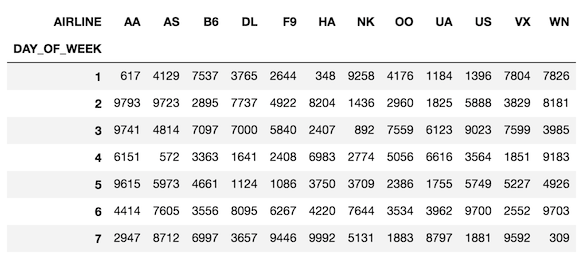


### `pivot`/ `pivot_table` methods reshape dataframes from 'long' to 'wide'
* `.pivot`/`.pivot_table` transforms:
    - a long table of rows 'indexed' by two characteristics,
    - into a wide table with one characteristic per axis.

* `.pivot` is a reshape that often follows a `groupby`.

In [ ]:
# Counts of Color/Sex
counts = people.groupby(["Color", "Sex"], as_index=False)['Number'].count()
counts

In [ ]:
# pivot method mereley reshapes the data
counts.pivot('Color', 'Sex', 'Number')

In [ ]:
# pivot method mereley reshapes the data
counts.pivot_table(index='Color', columns='Sex', values='Number')

### The `pivot_table` method can combine `groupby` and `pivot`

* Doing a pivot after a groupby is so common, `pivot_table` can do it!
* `aggfunc='count'` specifies to aggregate by count before pivoting.
* The equivalent of:
```
people.groupby(["Color", "Sex"], as_index=False)['Number'].count().pivot('Color', 'Sex', 'Number')
```

In [ ]:
people.pivot_table(
    values  = "Number", # the entry to aggregate over
    index   = "Color",  # the row grouping attributes
    columns = "Sex",    # the column grouping attributes
    aggfunc = "count"   # the aggregation function
)

### `pivot_table` observations

1. The second "grouping" column (`Sex`) has been **"pivoted" from the rows to column location**. 
2. There is a missing value for `pink` and `F` since none of the women chose `pink` as their favorite color.
    - specify how missing values are filled in with `fill_value` kwarg

In [ ]:
people.pivot_table(
    values  = "Number",
    index   = "Color",
    columns = "Sex",
    aggfunc = "count",
    #fill_value = 0.0
)

### `Pivot` conclusion

* Pivots reshape your data from long to wide.
* Other reshaping dataframe methods:
    - `melt`: un-pivots your data
    - `stack`: pivoting multi-level columns to multi-indices
    - `unstack`: pivoting multi-indices to columns

# Simpson's 'Paradox'

# Simpson's 'Paradox'
* Datasets look different at different granularities

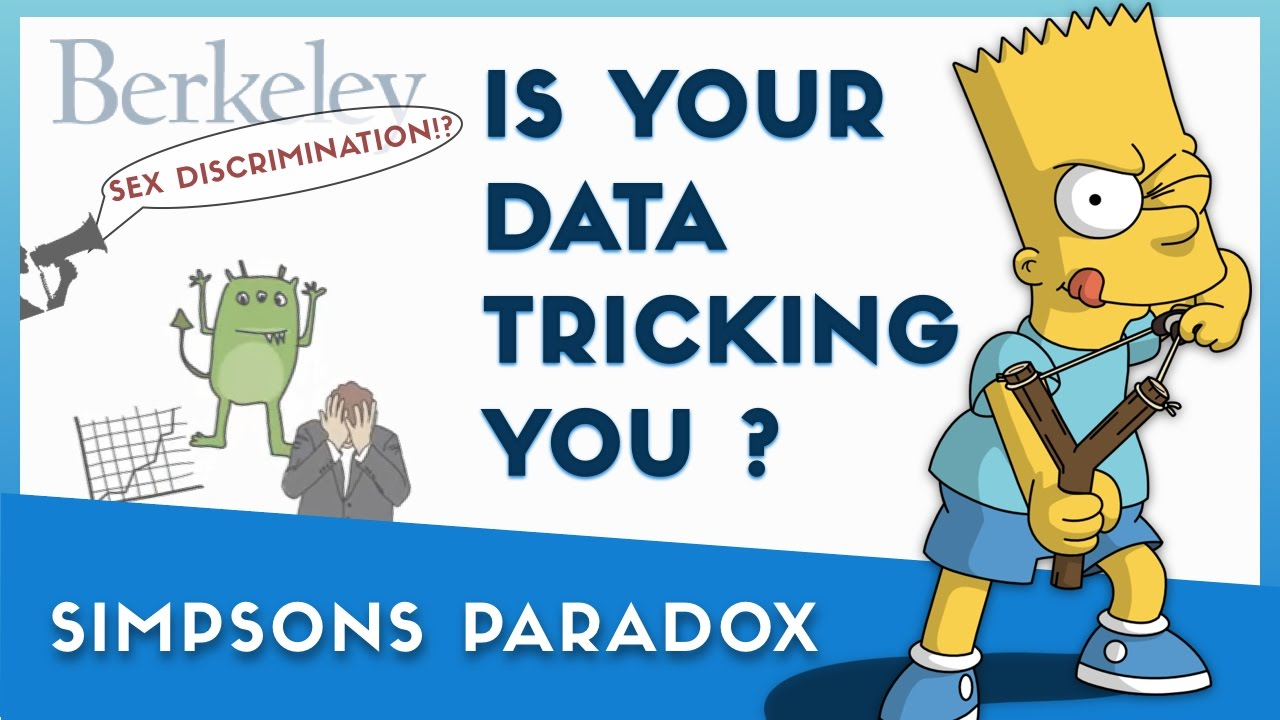

# Example 1. How Berkeley was sued for gender discrimination

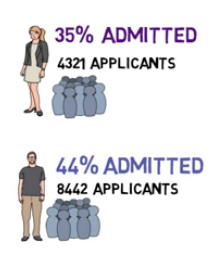

**Do you agree?**

## Researchers looked more closely within specific departments

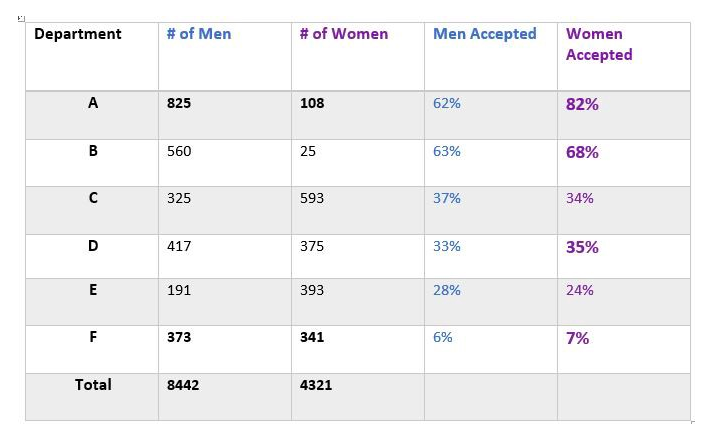

**and what did they see?**

(from here: https://medium.com/@dexter.shawn/how-uc-berkeley-almost-got-sued-because-of-lying-data-aaa5d641f571)

### What happened with admission?


<div class="image-txt-container">
    
<img src="simpsons_berkeley.png" width="50%">

<div></div>

* Most depts admitted MORE women!
* Dept A: few women applicants
* Dept F: many women applicants
* Women apply to harder depts.

    
</div>




### What happened? (by the numbers)

* Overall acceptance rate: 35% (women) to 44% (men).

* Dept A has an acceptance rate 82% for women vs 62% for men! 
    - **2%** of all women applied to Dept A.
    - **10%** of all men applied to Dept A.
    
* Dept F has an acceptance rate 6% for women vs 7% for men! 
    - **8%** of all women applied to Dept A.
    - **4%** of all men applied to Dept A.

**Conclusion:** Women tend to apply to depts with a low-acceptance rate.

## Simpson's Paradox

* When grouped data tells the opposite story of the ungrouped data. 

* This *often* happens because there is a hidden factor (*a confounder*) within the data that influences results.

* What is the "correct" way to summarize your data? What if you had to act on these results?

# Example 2. Hospital Example

* Should I send my elderly relative to Hospital A or B?

<img src="hospitals.png">
    
[[from here]](https://www.youtube.com/watch?v=sxYrzzy3cq8&feature=youtu.be) 

### Additional observation:

Not all patients arrive with the same health:

<br/>

<div class="image-txt-container">
    
    
    
<img src="A_poor.png" width="42%">


<img src="B_poor.png" width="45%">

    
</div>


Calculate the survival rate for those in poor health.

In [ ]:
# for A:
print(30*100/100)
# for B:
print(210*100/400)

### Question

* What if your relative's health is good? 
* What hospital should you choose, A or B?

Remember, that hospital 
* A had 900/1000 survivors (30/100 poor health) 
* B has 800/1000 survivors (210/400 poor health). 

Talk to each other and vote:

||
|---|---|
|A| Hospital A|
|B| Hospital B|
|C| Impossible to decide, not enough data|


### Simpson's paradox explanation: hospital example

* The data show opposite trends, depending on how it is grouped. 
* The hidden factor is the relative proportion of patients who arrived on good/poor health.
* *In this case*, how you act depends on which group you are in.

## Caution: Simpson's paradox is merely arithmetic

* Sometimes there are no *revelant* confounders.
* Simpson's paradox is present in ~2% of randomly chosen "grouping distributions".
* The best way to interpret the data depends on what you want from it!


### Restaurant reviews and phone types

* You are deciding between two restaurants with a friend.
* In a new feature, yelp aggregates attributes of reviewers for their reviews.
* Should you choose restaurant A or B? 

|Phone Type|Stars for A|Stars for B|
|---|---|---|
|Android|4.24|4.0|
|iPhone|2.99|2.79|
|___|___|___|
|All|3.32|3.37|



### Restaurant reviews and phone types
* It's doubtful that your phone-type will *cause* you to prefer one restaurant over another (?)
* If you aggregate again, the inequalities may flip *again* (e.g. phone-type ownership by zip-code)
* Simpson's paradox is merely a property of weighted averages!

* Maybe Android users give better reviews? But you care about relative rank!

### Verifying simpson's paradox
* Suppose we have a dataset of individual ratings
* Can you verify simpson's paradox?

In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings.head()